<a href="https://colab.research.google.com/github/vaibhaviitkgp/Bioinformatics_Project/blob/main/Assignment_2_MLBS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.read_csv("/content/data_train.csv")

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,793,A,782,A,1138,A,627,A,...,279,A,737,A,588,A,1170,A,2315,A
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,329,A,295,A,777,P,170,A,...,51,A,227,A,361,A,284,A,250,A
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,36,A,11,A,41,A,-50,A,...,6,A,-9,A,-26,A,39,A,-12,A
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,191,A,76,A,228,A,126,A,...,2484,P,371,A,133,A,298,A,790,P


In [ ]:
df = pd.read_csv("/content/data_train.csv")

In [ ]:
df_cleaned = df.drop(columns=[col for col in df.columns if col.startswith('call')])
df_cleaned

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,793,782,1138,627,250,645,1140,1799,...,752,1293,1733,1567,987,279,737,588,1170,2315
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,329,295,777,170,314,341,482,446,...,295,342,304,627,279,51,227,361,284,250
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,36,11,41,-50,14,26,10,59,...,28,26,12,21,22,6,-9,-26,39,-12
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,191,76,228,126,56,193,369,781,...,1558,246,3193,2520,662,2484,371,133,298,790


In [ ]:
df_cleaned.to_csv('df_cleaned.csv', index=False)

In [ ]:
correct_order = list(range(1, 28)) + list(range(28, 34)) + list(range(34, 39))
df_cleaned = df_cleaned[['Gene Description', 'Gene Accession Number'] + [str(i) for i in correct_order]]

In [ ]:
df_transposed = df_cleaned.set_index('Gene Accession Number').transpose()
df_transposed = df_transposed.drop('Gene Description', axis=0)
df_transposed


Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25
6,-138,-85,215,71,-272,-558,67,-186,87,193,...,115,1221,-76,172,-74,645,341,26,193,-53
7,-72,-144,238,55,-399,-551,131,-179,126,-20,...,30,819,-178,151,-18,1140,482,10,369,-42
8,-413,-260,7,-2,-541,-790,-275,-463,70,-169,...,289,629,-86,302,23,1799,446,59,781,20
9,5,-127,106,268,-210,-535,0,-174,24,506,...,356,980,6,177,-12,758,385,115,244,-39
10,-88,-105,42,219,-178,-246,328,-148,177,183,...,42,986,26,101,21,570,359,9,171,7


In [ ]:
df_transposed.to_csv('df_transposed.csv', index=False)

In [ ]:
X_train = df_transposed

In [ ]:
actual = pd.read_csv("/content/Copy of actual.csv")

In [ ]:
actual.iloc[0:38,:]

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL
5,6,ALL
6,7,ALL
7,8,ALL
8,9,ALL
9,10,ALL


In [ ]:
y_train = actual.iloc[0:38,:]

In [ ]:
pd.read_csv("/content/data_test.csv")

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,1074,A,67,A,893,P,722,A,...,707,A,423,A,809,A,466,A,551,A
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,475,A,263,A,297,A,170,A,...,354,A,41,A,445,A,349,A,194,A
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,48,A,-33,A,6,A,0,A,...,-22,A,0,A,-2,A,0,A,20,A
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,168,A,-33,A,1971,P,510,P,...,260,A,1777,P,210,A,284,A,379,A


In [ ]:
df2 = pd.read_csv("/content/data_test.csv")
df2_cleaned = df2.drop(columns=[col for col in df2.columns if col.startswith('call')])
df2_cleaned

,Gene Description,Gene Accession Number,39,40,42,47,48,49,41,43,...,54,57,58,60,61,65,66,63,64,62
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,-87,22,-243,-130,-256,-62,86,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,-248,-153,-218,-177,-249,-23,-36,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,262,17,-163,-28,-410,-7,-141,...,102,-82,-77,38,-21,-5,63,-46,-124,-81
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,295,276,182,266,24,142,252,...,319,178,340,31,396,141,95,146,431,9
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,-226,-211,-289,-170,-535,-233,-201,...,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,1074,67,893,722,612,1950,245,1235,...,618,507,1372,87,1111,707,423,809,466,551
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,475,263,297,170,370,906,164,9,...,308,64,642,98,459,354,41,445,349,194
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,48,-33,6,0,29,79,84,7,...,0,-11,-9,-26,-8,-22,0,-2,0,20
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,168,-33,1971,510,333,170,100,1545,...,196,198,608,153,73,260,1777,210,284,379


In [ ]:
df2_cleaned.to_csv('df2_cleaned.csv', index=False)

In [ ]:
sorted_columns = ['Gene Description', 'Gene Accession Number'] + sorted(df2_cleaned.columns[2:].tolist())
df2_sorted = df2_cleaned[sorted_columns]

In [ ]:
df2_transposed = df2_sorted.set_index('Gene Accession Number').transpose()
df2_transposed = df2_transposed.drop('Gene Description', axis=0)
df2_transposed

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
41,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,129,383,46,104,15,245,164,84,100,-18
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
43,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,341,91,-84,615,-52,1235,9,7,1545,-81
44,-146,-74,170,174,-32,-318,8,-152,-148,17,...,180,690,-142,249,-220,354,-42,-100,45,-108
45,-187,-187,312,142,114,-148,-184,-133,12,97,...,37,125,-185,13,-148,304,-1,-207,112,-190
46,-56,-43,43,177,-116,-184,-105,-62,0,-40,...,103,593,0,-24,18,625,173,63,63,-62
47,-243,-218,-163,182,-289,-268,-285,-172,52,-134,...,174,277,6,81,2,722,170,0,510,-73
48,-130,-177,-28,266,-170,-326,-222,-93,10,159,...,233,643,51,450,-46,612,370,29,333,-19


In [ ]:
df2_transposed.to_csv('df2_transposed.csv', index=False)

In [ ]:
X_test = df2_transposed

In [ ]:
actual.iloc[38:,1:]

,cancer
38,ALL
39,ALL
40,ALL
41,ALL
42,ALL
43,ALL
44,ALL
45,ALL
46,ALL
47,ALL


In [ ]:
y_test = actual.iloc[38:,1:]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train['cancer'])
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test['cancer'], rf_predictions)
rf_accuracy


0.8529411764705882

In [ ]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train['cancer'])
svm_linear_predictions = svm_linear.predict(X_test)
svm_linear_accuracy = accuracy_score(y_test['cancer'], svm_linear_predictions)
svm_linear_accuracy


0.9705882352941176

In [ ]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train['cancer'])
svm_rbf_predictions = svm_rbf.predict(X_test)
svm_rbf_accuracy = accuracy_score(y_test['cancer'], svm_rbf_predictions)
svm_rbf_accuracy


0.6176470588235294

In [ ]:
svm_sig = SVC(kernel='poly', random_state=42)
svm_sig.fit(X_train, y_train['cancer'])
svm_sig_predictions = svm_sig.predict(X_test)
svm_sig_accuracy = accuracy_score(y_test['cancer'], svm_sig_predictions)
svm_sig_accuracy

0.7352941176470589

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
y_train_encoded = pd.get_dummies(y_train['cancer']).values
y_test_encoded = pd.get_dummies(y_test['cancer']).values

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, verbose=0)
nn_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)[1]
nn_accuracy


0.970588207244873

In [ ]:
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train['cancer'])
rf_predictions = rf.predict(X_test)

svc = SVC(random_state=42)
svc.fit(X_train, y_train['cancer'])
svc_predictions = svc.predict(X_test)

rf_report = classification_report(y_test, rf_predictions)
svc_report = classification_report(y_test, svc_predictions)

rf_report


'              precision    recall  f1-score   support\n\n         ALL       0.80      1.00      0.89        20\n         AML       1.00      0.64      0.78        14\n\n    accuracy                           0.85        34\n   macro avg       0.90      0.82      0.84        34\nweighted avg       0.88      0.85      0.85        34\n'

In [ ]:
 svc_report

'              precision    recall  f1-score   support\n\n         ALL       0.61      1.00      0.75        20\n         AML       1.00      0.07      0.13        14\n\n    accuracy                           0.62        34\n   macro avg       0.80      0.54      0.44        34\nweighted avg       0.77      0.62      0.50        34\n'

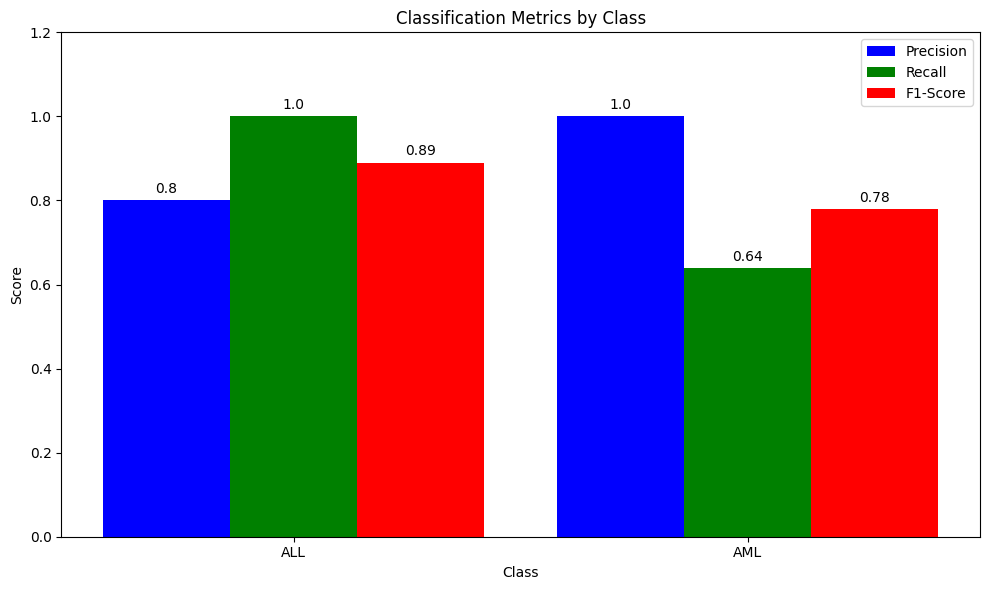

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the classification report
labels = ["ALL", "AML"]
precision = [0.80, 1.00]
recall = [1.00, 0.64]
f1_score = [0.89, 0.78]

x = np.arange(len(labels))  # the label locations
width = 0.28  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting each metric
rects1 = ax.bar(x - width, precision, width, label='Precision', color='blue')
rects2 = ax.bar(x, recall, width, label='Recall', color='green')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='red')


ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Classification Metrics by Class for Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0, 1.2)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


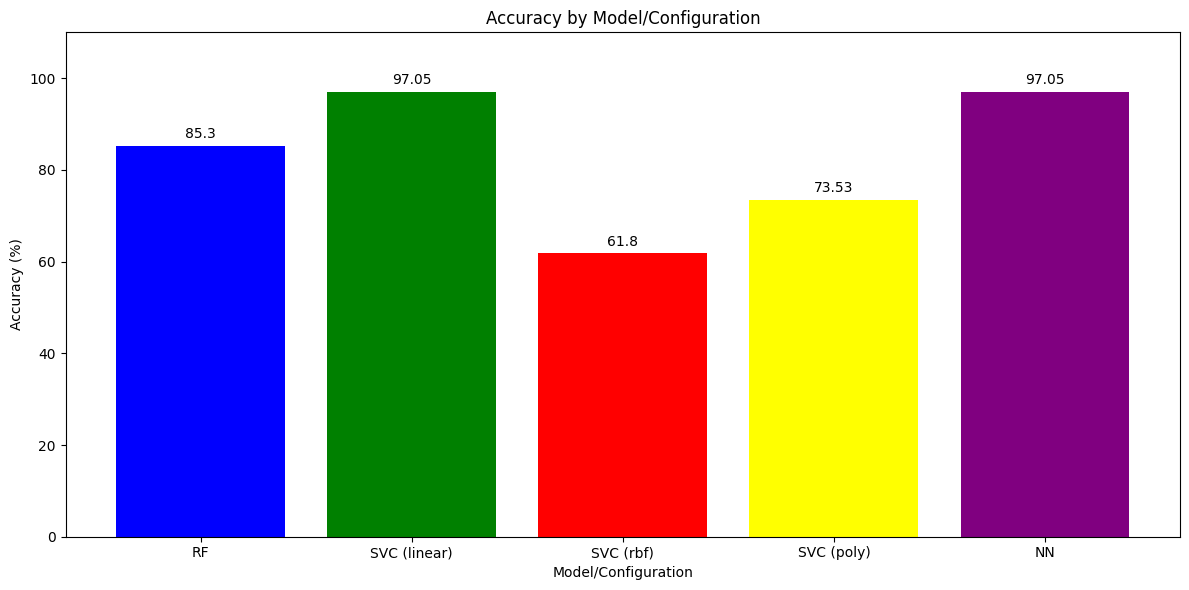

In [ ]:
# Data
models = ["RF", "SVC (linear)", "SVC (rbf)", "SVC (poly)", "NN"]
accuracy = [85.3, 97.05, 61.8, 73.53, 97.05]

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting
bars = ax.bar(models, accuracy, color=['blue', 'green', 'red', 'yellow', 'purple'])

# Setting labels, title, and custom x-axis tick labels
ax.set_xlabel('Model/Configuration')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy by Model/Configuration')
ax.set_ylim(0, 110)  # setting y limit for better visualization

# Annotating each bar with its value
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()
